# 911 Calls Capstone Project

For this capstone project I analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [3]:
import numpy as np
import pandas as pd

** Importing visualization libraries and set %matplotlib inline. **

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Reading the csv file**

In [6]:
df = pd.read_csv('911.csv')

** Checking the info **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** Top 5 zipcodes for 911 calls **

In [11]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **

In [12]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Unique title codes **

In [13]:
df['title'].nunique()

110

## Creating new features

**The column "Reasons/Departments" specified before the title code has EMS, Fire, and Traffic. Creating new column 'Reason' by separating them with the help of apply()method** 


In [19]:
df['Reason']= df['title'].apply(lambda title: title.split(':')[0])

**Most common Reason for a 911 call based off of Reason column **

In [20]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Using seaborn to create a countplot of 911 calls by Reason. **

<AxesSubplot:xlabel='Reason', ylabel='count'>

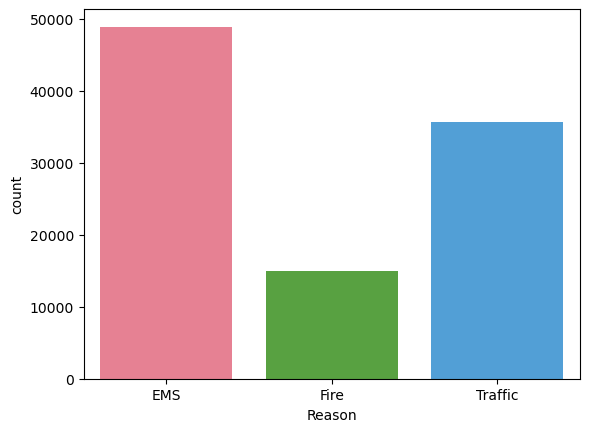

In [30]:
sns.countplot(x=df['Reason'],data=df,palette ='husl')

___
** Now let us begin to focus on time information. Checking data type of the objects in the timeStamp column **

In [34]:
type(df['timeStamp'].iloc[0])

str

** Changing data typee to integer **

In [41]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])



**using .apply() to create 3 new columns called Hour, Month, and Day of Week..**

In [48]:
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time:time.dayofweek)

** map() Using this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [49]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [50]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

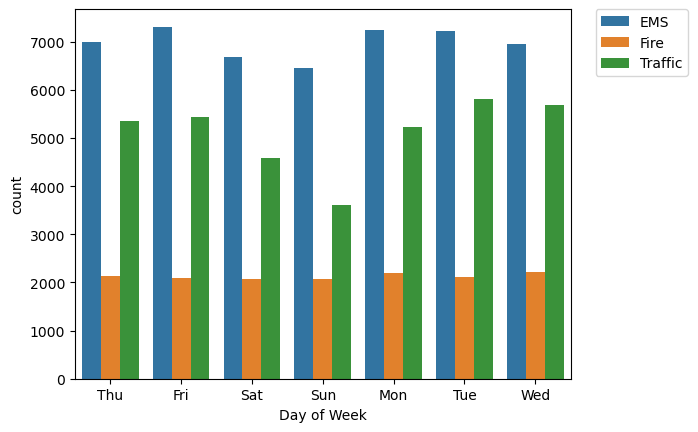

In [61]:
sns.countplot( x= 'Day of Week', data =df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**For Month:**

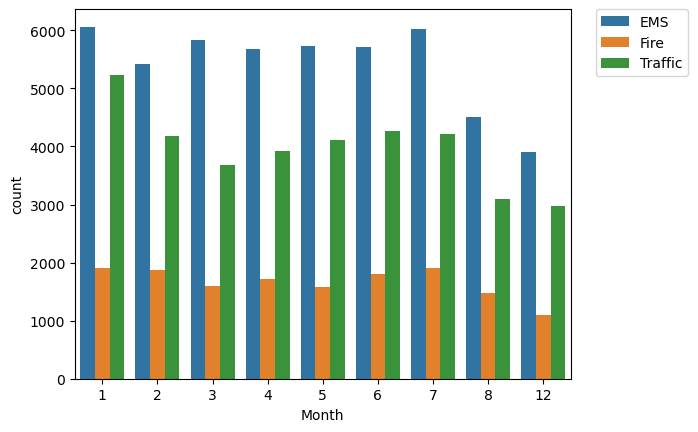

In [62]:
sns.countplot( x= 'Month', data =df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


** It is missing some Months**

** Creating a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation.  **

In [66]:
byMonth= df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week,Day of week,Day of Week
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


** Creating a simple plot off of the dataframe indicating the count of calls per month. **

<AxesSubplot:xlabel='Month'>

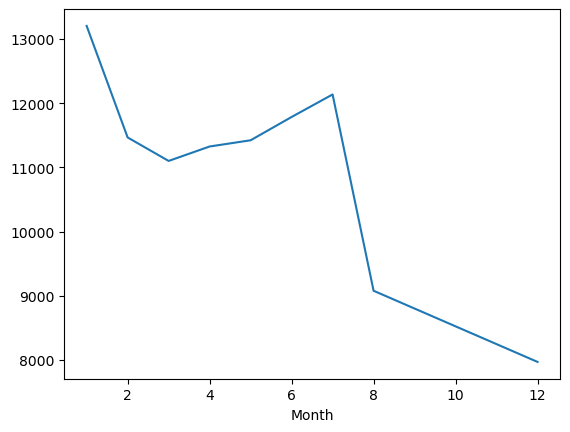

In [70]:
byMonth['desc'].plot()

** Using seaborn's lmplot() to create a linear fit on the number of calls per month**

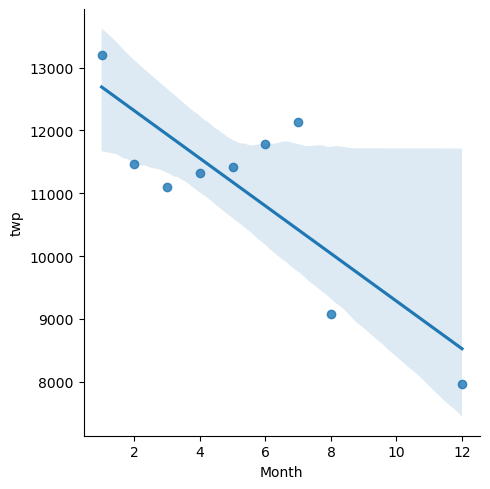

In [76]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.  ** 

In [81]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

** Using groupby for Date column with the count() aggregate and creating a plot of counts of 911 calls.**

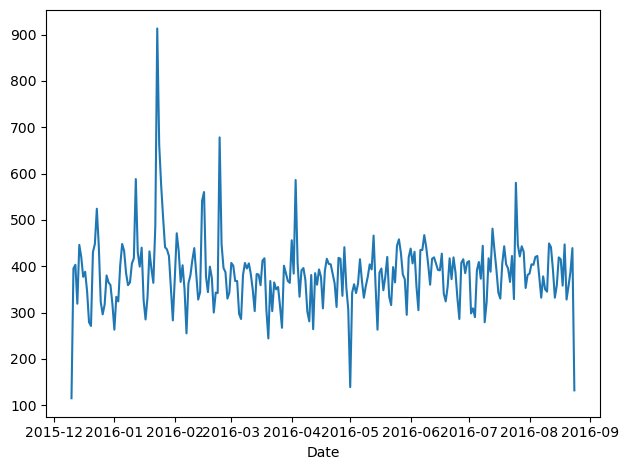

In [109]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

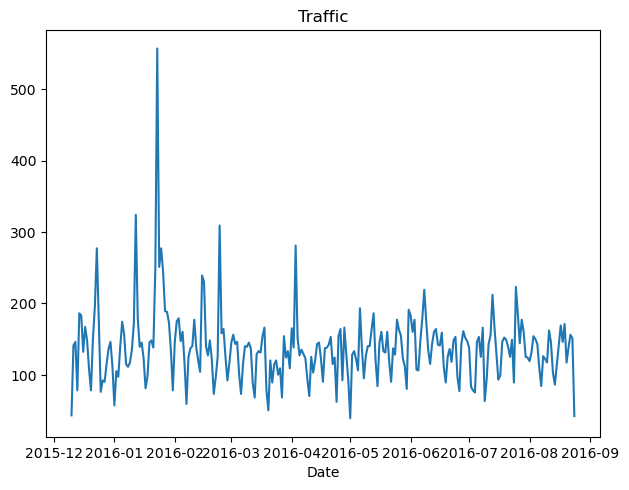

In [112]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("Traffic")


Text(0.5, 1.0, 'Fire')

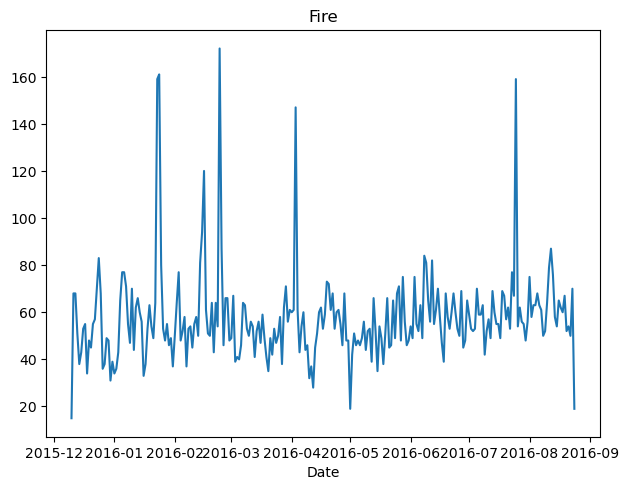

In [113]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("Fire")


Text(0.5, 1.0, 'EMS')

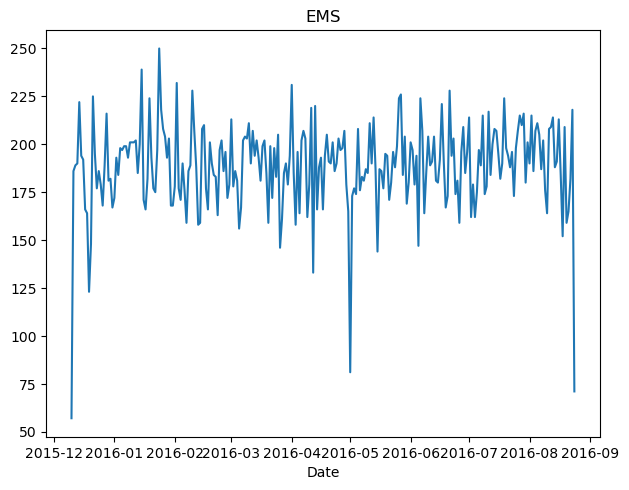

In [114]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title("EMS")


____
** Creating  heatmaps with seaborn and our data. Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. **

In [115]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Creating a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

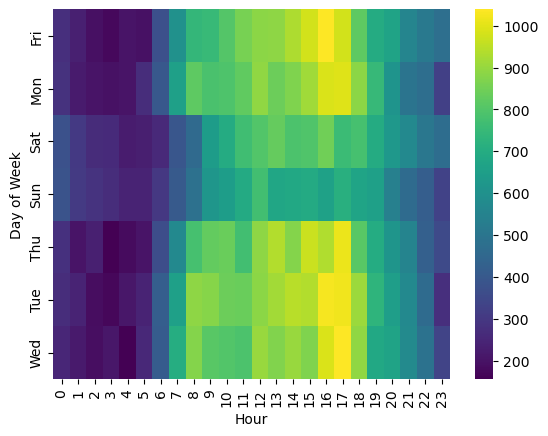

In [119]:
sns.heatmap(dayHour,cmap='viridis')

** Creating a clustermap using this DataFrame. **

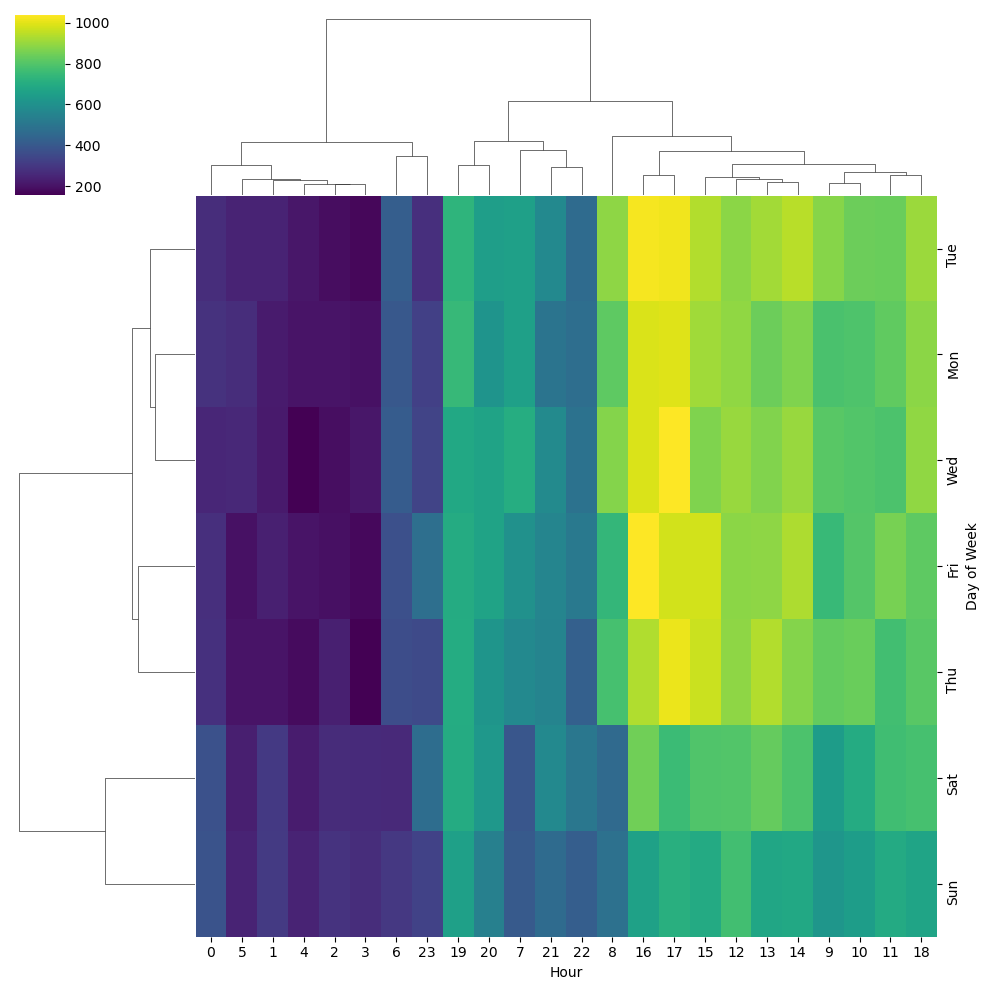

In [120]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [121]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

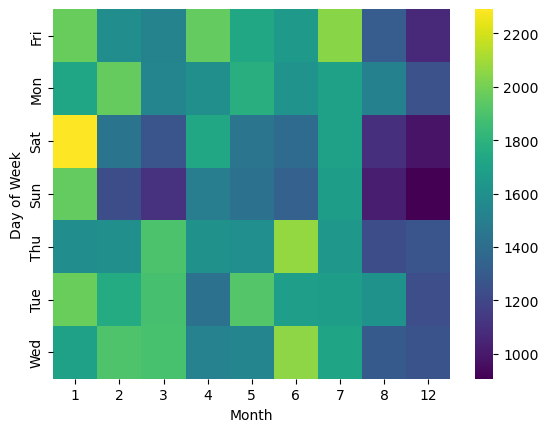

In [122]:
sns.heatmap(dayMonth,cmap='viridis')

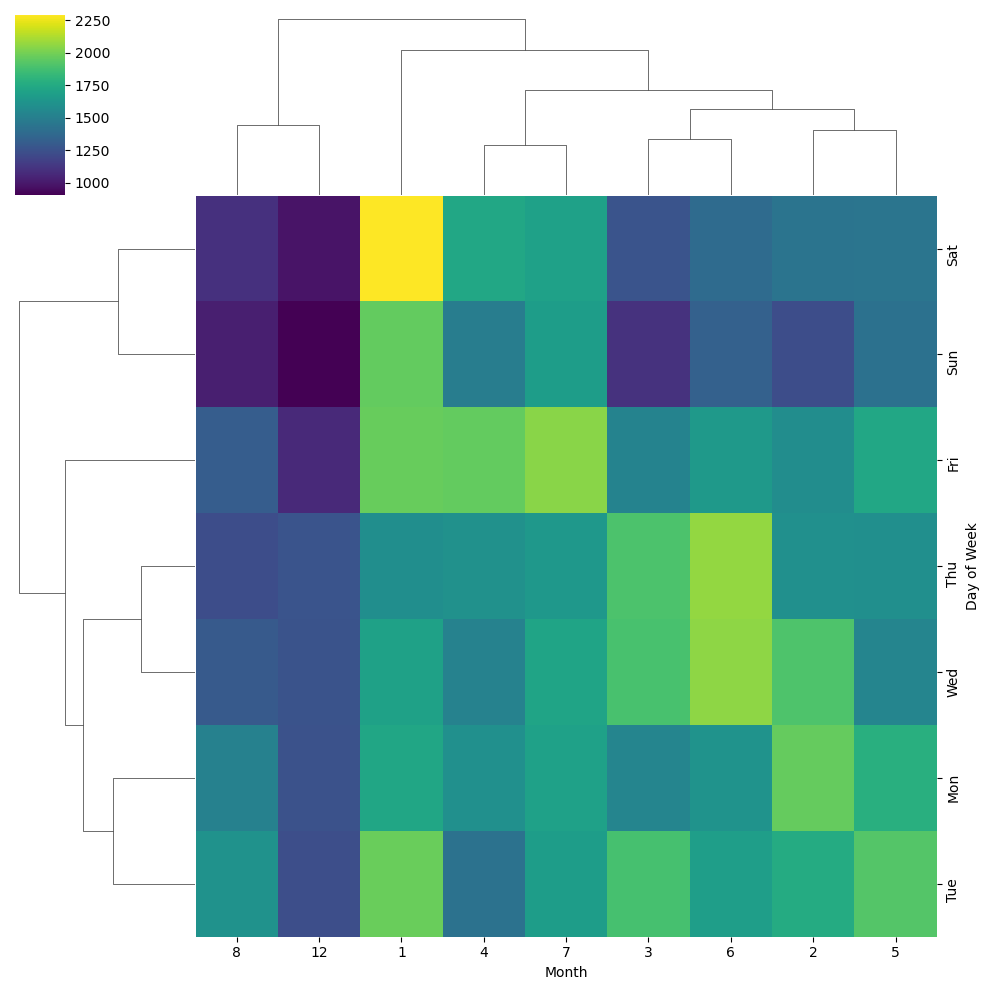

In [123]:
sns.clustermap(dayMonth,cmap='viridis')